**Introduction**


In [3]:
import numpy as np
from scipy import optimize 
import matplotlib.pyplot as plt
from Functions import *
from Gradient import  *
from Newton import *
from Graphics import *
import time



##  4) Méthode de Newton :
En utilisant la method de newton on va chercher a minimiser le carré de la norme du résidu.
Ce dernier est definis ainsi :
    $$ ||R(\Theta)||^{2}=(L_{1}cos(\theta_{1})+L_{2}cos(\theta_{1}+\theta_{2})-x)^{2} + (L_{1}sin(\theta_{1})+L_{2}sin(\theta_{1}+\theta_{2})-y)^{2} $$
    
$||R(\Theta)||^{2}$ definie de $R^{n}$ dans $R$ avec $\theta$ etant un vecteur de 2 valeurs: $\Theta=(\theta_{1},\theta_{2})$ ou $\theta_{1}$ est l'angle de la premiere articulation et $\theta_{2}$ l'angle de la 2eme articulation. du robot 2R .

Notre fonction est differentiable d'ordre $2$ ce qui nous permets de definir 2 parameters tres important pour la method de Newton:

1) Le gradient: $\nabla||R(\Theta)||^{2}$:
<table border="0">  <tr>    <tr>     <td>$$
\nabla ||R(\Theta)||^{2}=
\begin{pmatrix}
\frac{\partial ||R(\Theta)||^{2}}{\partial \theta_{1}}\\
\frac{\partial ||R(\Theta)||^{2}}{\partial \theta_{2}}
\end{pmatrix}
$$</td>     <td>$$
 =\begin{pmatrix}
2x(L1sin(\theta_{1})+L2sin(\theta_{1}+\theta_{2}))-2y(L1cos(\theta_{1})+L2cos(\theta_{1}+\theta_{2}))\\
-2L1L2sin(\theta_{2})+2xL2sin(\theta_{1}+\theta_{2})-2yL2.cos(\theta_{1}+\theta_{2})
\end{pmatrix}
$$</td>  </tr> </table> 
2) La hessienne:$H||R(\Theta)||^{2}$:

<table border="0">  <tr>    <tr>     <td>$$
H ||R(\theta)||^{2}=
\begin{pmatrix}
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{1}\theta_{1}}\\
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{1}\theta_{2}}\\
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{2}\theta_{1}}\\
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{2}\theta_{2}}
\end{pmatrix}
$$</td>     <td>$$
 =\begin{pmatrix}
2x(L_{1}cos(\theta_{1})+L_{2}cos(\theta_{1}+\theta_{2}))+2y(L_{1}sin(\theta_{1})+L_{2}sin(\theta_{1}+\theta_{2}))\\
 2xL_{2}cos(\theta_{1}+\theta_{2})+2yL_{2}sin(\theta_{1}+\theta_{2})\\
 2xL_{2}cos(\theta_{1}+\theta_{2})+2yL_{2}sin(\theta_{1}+\theta_{2})\\
 -2L_{1}L_{2}cos(\theta_{2})+2xL_{2}cos(\theta_{1}+\theta_{2})+2yL_{2}sin(\theta_{1}+\theta_{2})
\end{pmatrix}
$$</td>  </tr> </table>

L'algorithm de newton se base sur l'equation :$\Theta_{n+1}=\Theta_{n}+\Delta\theta$ avec $\Delta\Theta$ comme solution de l'equation: $$H||R(\Theta_{n})||^{2}.\Delta\Theta=-\nabla||R(\Theta_{n})||^{2}$$

en apliquant cette technique pour un certain nombre d'itteration on se raprochera de plus en plus du <b>Minimum</b>

#### Convergence:
Si la fonction de cout $||R(\Theta)||^{2}$ est convexe dans la region etudié, et si on choisit $ \Theta_{0}$  assez proche de la solution, apres un certain nombre d'iteration $N$  la sequence $\Theta_{0},\Theta_{1},\Theta_{2},...,\Theta_{N}$  generées par la method Newton convergera au minimum $\Theta_{*}=\Theta_{N}$

#### Mise en garde sur l'utilisation de Newton 2D:
Si les condition de convergence ne sont pas respecté plusieurs soucis de performance sont à prevoir:
- La method peut ne pas converger du tout et entrer dans un cycle d'un point ou plusieurs points.
- Le point d'iteration peut etre sationnaire ce qui conduit à un blocage de la method sur en ce point.
- l'algorithm peut converger vers un point de selle au lieu d'un minimum local


### Implementation de la method de Newton:
ici on ilustre un exemple de la method de newton: <br>
On veut atteindre la position (3,0) avec $\Theta_{init}=(\pi/4,\pi/4)$. On peut voir en activant les isovaleurs que l'algorithm atteint bien sa destination apres 8 iteration en mettant l'argumant $Disp=True$ plus d'information seront affichées:

In [5]:
L1 = 3
L2 = 3
# Vecteur de parametres  
Params = [L1,L2,None] # La troisieme valeur de Params est le vecteur de la position desirée X

 Iterations : 1 	 |dtheta| = 2.449489742783178
 Iterations : 2 	 |dtheta| = 1.3094705645636342
 Iterations : 3 	 |dtheta| = 1.0622663924841673
 Iterations : 4 	 |dtheta| = 0.3177222711409134
 Iterations : 5 	 |dtheta| = 0.06949915588315234
 Iterations : 6 	 |dtheta| = 0.003045762403719338
 Iterations : 7 	 |dtheta| = 2.6799494532196675e-06
 Iterations : 8 	 |dtheta| = 4.286434866517271e-12
Minimum trouve apres 8 iterations
les angles optimaux = (-1.0471975511965976, 2.0943951023931953)
Le point (X,Y) = [3. 0.]


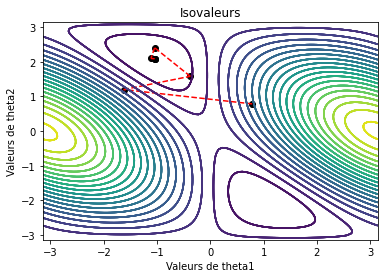

In [9]:
Params[2]=[3,0]
Angles,success=Newton([np.pi/4,np.pi/4],Params,0.0000001,100,Disp=True,IsoV=True)

#### Representation du Robot:

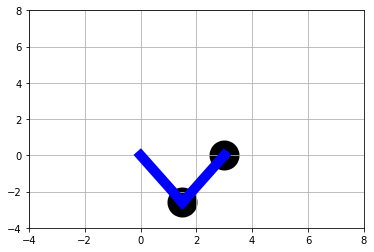

In [10]:
animate(Angles,Params)
plt.grid()

### Limitations de la method:
Comme dit precedement le choix du point initial ( ou dans notre cas le $\Theta_{init}$) est tres <b>critique </b> Ce dernier doit etre chosis minutieusement pour eviter de tomber dans les cas ou l'algorithm ne converge pas   <br>
Pour illustrer cela, on va garder la meme configuration initial $\Theta_{init}=(\pi/4,\pi/4)$ avec maintenant une position final de (3,2): 

 Iterations : 1 	 |dtheta| = 0.7219625036587618
 Iterations : 2 	 |dtheta| = 0.36830967025409683
 Iterations : 3 	 |dtheta| = 0.004080369594593711
 Iterations : 4 	 |dtheta| = 1.7903713016894857e-08
Minimum trouve apres 4 iterations
les angles optimaux = (0.5880026035475676, -1.722080748232873e-16)
Le point (X,Y) = [4.99230177 3.32820118]


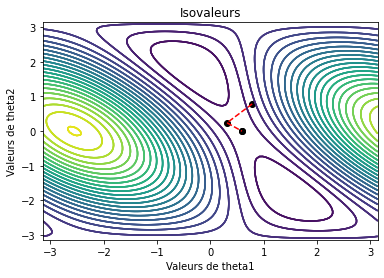

In [45]:
Params[2]=[3,2]
Angles,success=Newton([np.pi/4,np.pi/4],Params,0.0000001,100,Disp=True,IsoV=True)

##### Dans ce cas l'algorithm a atterri sur un point selle et non un minimum
<b> Remarque </b> : Le point initial choisis est beaucoup plus proche du point selle que du minimum local, ce qui a provoqué la non convergence de l'algorithm vers la solution désiré.<br>
On va essayer de reprenter la position du robot quand meme:

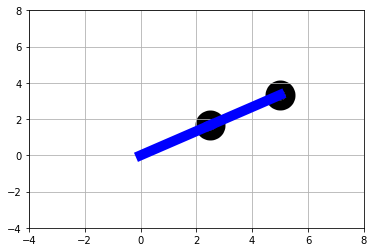

In [46]:
animate(Angles,Params)
plt.grid()

##### On remarque clairement qu'on est tres loin du (3,2) ...

## Interpolation de Trajectoire avec la method de Newton
On va implementer un mouvment lineaire du Robot . Le 2R devra aller du $(3,0)$ au point $(0,5)$ en passant par une trajectoire de la forme d'une ligne droite. 

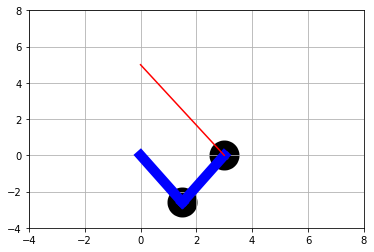

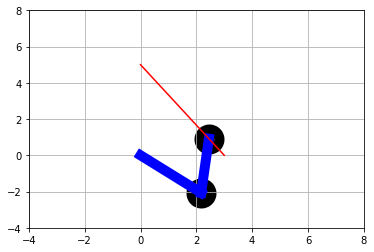

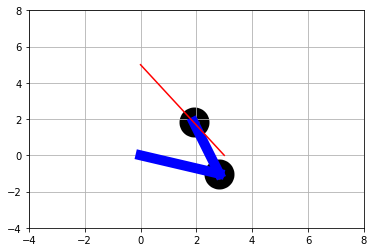

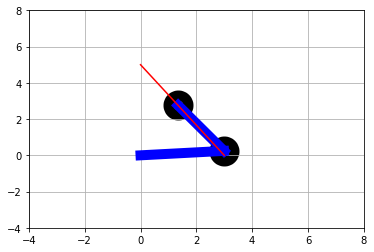

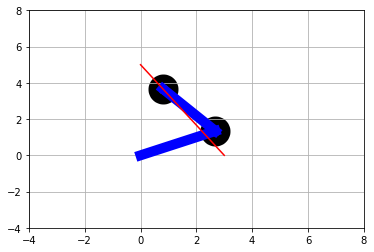

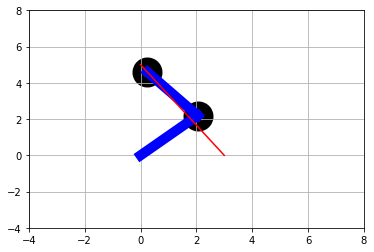

In [62]:
#Interpolation Lineaire
Xi=[3,0]
Xf=[0,5]
N=50
xl,yl=Interp(Xi,Xf,N)

# Configuration initiale
ConfigInit = [np.pi/4,np.pi/4] 
# Valeur initialle 
# Nombre de points les calculs sont fait avant que le robot sois afficher le robot
ptAfficher = 9 
ConfigAct = ConfigInit
plt.figure()
for i in  range(N): 
    X=[xl[i],yl[i]]
    Params[2] = X
    Solution,converge=Newton(ConfigAct,Params,0.0000001,100,Disp=False,IsoV=False)
    if (not converge ) : 
        break 
    if (i % ptAfficher == 0 ):
        animate(Solution,Params)
        plt.plot(xl,yl,'r', label = 'droite')
        plt.grid()
        plt.show()
    ConfigAct = Solution